In [1]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import csv
import time
import scipy.stats as st
from scipy.stats import linregress


In [2]:
## Output File (CSV)
data_file_day = "archive/day.csv"
data_file_hour="archive/hour.csv"
#Creating DataFrame
Bike_Share_Day=pd.read_csv(data_file_day)
Bike_Share_Hour=pd.read_csv(data_file_hour)
#print(Bike_Share_Day.head())
print(Bike_Share_Hour.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


# Time of day vs Bike Rentals

In [3]:
Bike_Hour_Count=Bike_Share_Hour.groupby(Bike_Share_Hour['hr']).count()['cnt']
Bike_Hour_Count_df=pd.DataFrame({'Bikes Count':Bike_Hour_Count})
Bike_Hour_Count_df

,Bikes Count
hr,
0,726
1,724
2,715
3,697
4,697
5,717
6,725
7,727
8,727


# Weather patterns vs Bike Rentals

# Seasons vs Bike Rentals

# Weekday versus Weekend  Bike Rentals

In [77]:
Bike_Share_Day.head(10)
Bike_Share_Day_Drop = Bike_Share_Day[['weekday', 'workingday', 'holiday', 'cnt']]
Bike_Share_Day_Drop['cnt'].sum()
# Number of rentals over the workingdays

# Identifying the day types
WorkingDay_Bike_Share = Bike_Share_Day_Drop.loc[Bike_Share_Day_Drop['workingday'] == 1]
Weekends_Bike_Share = Bike_Share_Day_Drop.loc[(Bike_Share_Day_Drop['weekday'] == 0) | (Bike_Share_Day_Drop['weekday'] == 6)]
Holiday_Bike_Share = Bike_Share_Day_Drop.loc[Bike_Share_Day_Drop['holiday'] == 1]

# Counting number of rentals per day type
WorkingDay_Counts = WorkingDay_Bike_Share['cnt'].sum()
WeekendsDay_Counts = Weekends_Bike_Share['cnt'].sum()
HolidayDays_Counts = Holiday_Bike_Share['cnt'].sum()

# printing results
print(f'Working Days Count: {WorkingDay_Counts}, Weekend Days Count: {WeekendsDay_Counts} and Holidays Count: {HolidayDays_Counts}')

# Verifying counts
totalbike_counts = Bike_Share_Day_Drop['cnt'].sum()
totalbike_counts_var = WorkingDay_Counts + WeekendsDay_Counts + HolidayDays_Counts
print(f' OG {totalbike_counts}, verif {totalbike_counts_var}')

# getting average counts per diem
Number_of_WorkingDays = WorkingDay_Bike_Share['cnt'].count()
WorkingDay_Counts_perdiem = WorkingDay_Counts/Number_of_WorkingDays

Number_of_Weekend_Days = Weekends_Bike_Share['cnt'].count()
WeekendDay_Counts_perdiem = WeekendsDay_Counts/Number_of_Weekend_Days

Number_of_Holidays = Holiday_Bike_Share['cnt'].count()
HoliDay_Counts_perdiem = HolidayDays_Counts/Number_of_Holidays

print(f' Workingdays {Number_of_WorkingDays}, Weekends {Number_of_Weekend_Days}, Holidays {Number_of_Holidays}')
print(f' Total Days {Number_of_WorkingDays + Number_of_Weekend_Days + Number_of_Holidays}')
print(f" Working Days Average Ride Count: {WorkingDay_Counts_perdiem}, Weekend Days Average Ride Count: {WeekendDay_Counts_perdiem}, Holidays Average Ride Count: {HoliDay_Counts_perdiem}")

Working Days Count: 2292410, Weekend Days Count: 921834 and Holidays Count: 78435
 OG 3292679, verif 3292679
 Workingdays 500, Weekends 210, Holidays 21
 Total Days 731
 Working Days Average Ride Count: 4584.82, Weekend Days Average Ride Count: 4389.685714285714, Holidays Average Ride Count: 3735.0


<BarContainer object of 3 artists>

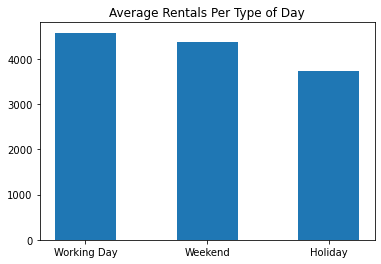

In [76]:
x = np.arange(len(x))
height = [WorkingDay_Counts_perdiem, WeekendDay_Counts_perdiem, HoliDay_Counts_perdiem]
tick_locations = [value for value in x]
plt.xticks(tick_locations, ["Working Day", "Weekend", "Holiday"])
plt.title("Average Rentals Per Type of Day")
plt.bar(x, height, width=0.5, bottom=None, align='center', data=None)

In [23]:
stats.ttest_ind(population1.vertebrae, population2.vertebrae, equal_var=False) 

,weekday,workingday,holiday,cnt
0,6,0,0,985
1,0,0,0,801
2,1,1,0,1349
3,2,1,0,1562
4,3,1,0,1600
5,4,1,0,1606
6,5,1,0,1510
7,6,0,0,959
8,0,0,0,822
9,1,1,0,1321


# Holiday vs Bike Rentals